# Data Mining - Project
## Group Members
|Name|StudentID|
|:-----------:|:--------:|
|Fabio Lopes|20200597|
|Filipe Costa|20201041|
|Jorge Pereira|20201085|


In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv('donors.csv')

C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,...,7.741935,95515,0,L,4,E,X,X,X,C
1,1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2,2010-01-01,AMH,1,NC,27017,,,NaN,0,...,7.481481,15078,1,L,4,E,X,X,X,C
3,3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,...,6.812500,172556,1,L,4,E,X,X,X,C
4,4,2006-01-01,,0,FL,33176,,,1940-01-01,0,...,6.864865,7112,1,L,2,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,95407,2016-01-01,ASE,1,AK,99504,,,NaN,0,...,25.000000,184568,0,L,1,G,X,X,X,C
95408,95408,2016-01-01,DCD,1,TX,77379,,,1970-01-01,0,...,20.000000,122706,1,L,1,F,X,X,X,A
95409,95409,2015-01-01,MBC,1,MI,48910,,,1958-01-01,0,...,8.285714,189641,1,L,3,E,X,X,X,B
95410,95410,2006-01-01,PRV,0,CA,91320,,,1960-05-01,0,...,12.146341,4693,1,L,4,F,X,X,X,A


In [4]:
numericDf = df._get_numeric_data()
categoricalDF = df.drop(numericDf.columns, axis = 1)
print('Numerical columns: ' + str(len(numericDf.columns)) +  '\nCategorical columns: ' + str(len(categoricalDF.columns)))

Numerical columns: 351
Categorical columns: 125


# Categorical Data Preparation

In [5]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
ColumnsToPassOver = ['ODATEDW',
                    'OSOURCE',
                    'TCODE',
                    'STATE',
                    'CHILD03',
                    'CHILD07',
                    'CHILD12',
                    'CHILD18',
                    'NUMCHLD',
                    'INCOME',
                    'GENDER',
                    'WEALTH1',
                    'HIT',
                    'MBCRAFT',
                    'MBGARDEN',
                    'MBBOOKS',
                    'MBCOLECT',
                    'MAGFAML',
                    'MAGFEM',
                    'MAGMALE',
                    'PUBGARDN',
                    'PUBCULIN',
                    'PUBHLTH',
                    'PUBDOITY',
                    'PUBNEWFN',
                    'PUBPHOTO',
                    'PUBOPP',
                    'DATASRCE',
                    'MALEMILI',
                    'MALEVET',
                    'VIETVETS',
                    'WWIIVETS',
                    'LOCALGOV',
                    'STATEGOV',
                    'FEDGOV',
                    'WEALTH2',
                    'LIFESRC',
                    'CARDPROM',
                    'NUMPROM',
                    'CARDPM12',
                    'NUMPRM12',
                    'RAMNTALL',
                    'NGIFTALL',
                    'CARDGIFT',
                    'MINRAMNT',
                    'MAXRAMNT',
                    'LASTGIFT',
                    'TIMELAG',
                    'AVGGIFT',
                    'HPHONE_D',
                    'GEOCODE2'
                    ]

In [7]:
dataprep = pd.DataFrame(df[ColumnsToPassOver])

In [8]:
# MAILCODE variable indicates if the address is ok or not, transforming in Boolean.
def prepMAILCODE(Code):
    if Code == 'B':
        return 0 #Bad Address
    else:
        return 1 #Address is OK

dataprep['MAILCODE'] = df['MAILCODE'].apply(prepMAILCODE)

In [9]:
# ZIP has some incorrect characters. Cleaning that up.
def prepZIP(ZIP):
    return ZIP.replace('-','')

dataprep['ZIP'] = df['ZIP'].apply(prepZIP)

In [10]:
# PVASTATE indicates if the donor lives in a state served by the EPVA. Transforming to Bool
def prepPVASTATE(Code):
    if Code == 'P':
        return 1 #PVA State
    else:
        return 0 #EPVA State (Northeastern US)

dataprep['PVASTATE'] = df['PVASTATE'].apply(prepPVASTATE)

In [11]:
# NOEXCH indicates the exchange flag. Transforming to Bool
def prepNOEXCH(Code):
    if Code == 'X':
        return 0 #Can't be exchanged
    else:
        return 1 #Can be exchanged

dataprep['NOEXCH'] = df['NOEXCH'].apply(prepNOEXCH)

In [12]:
# NOEXCH indicates the inhouse flag. Transforming to Bool
def prepRECINHSE(Code):
    if Code == 'X':
        return 1 #Donor has given to PVA's In House program
    else:
        return 0 #Not an In House Record

dataprep['RECINHSE'] = df['RECINHSE'].apply(prepRECINHSE)

In [13]:
# RECP3 indicates the p3 flag. Transforming to Bool
def prepRECP3(Code):
    if Code == 'X':
        return 1 #Donor has given to PVA's P3 program
    else:
        return 0 #Not a P3 Record

dataprep['RECP3'] = df['RECP3'].apply(prepRECP3)

In [14]:
# RECPGVG indicates the planned giving flag. Transforming to Bool
def prepRECPGVG(Code):
    if Code == 'X':
        return 1 #Planned Giving Record
    else:
        return 0 #Not a Planned Giving Record

dataprep['RECPGVG'] = df['RECPGVG'].apply(prepRECPGVG)

In [15]:
# RECSWEEP indicates the sweepstakes flag. Transforming to Bool
def prepRECSWEEP(Code):
    if Code == 'X':
        return 1 #Sweepstakes Record
    else:
        return 0 #Not a Sweepstakes Record

dataprep['RECSWEEP'] = df['RECSWEEP'].apply(prepRECSWEEP)

In [16]:
# MDMAUD handling
# If X, it is not a major donor
# First byte: Recency of Giving
#     C=Current Donor
#     L=Lapsed Donor
#     I=Inactive Donor
#     D=Dormant Donor

# 2nd byte: Frequency of Giving
#     1=One gift in the period of recency
#     2=Two-Four gifts in the period of recency
#     5=Five+ gifts in the period of recency

# 3rd byte: Amount of Giving
#     L=Less than $100(Low Dollar)
#     C=$100-499(Core)
#     M=$500-999(Major)
#     T=$1,000+(Top)

def prepMAJORDONOR(Code):
    if Code[0] == 'X':
        return 0
    else:
        return 1
    
dataprep['MAJORDONOR'] = df['MDMAUD'].apply(prepMAJORDONOR)
dataprep['GIVING_FREQUENCY'] = df['MDMAUD'].apply(lambda x: x[1] if x[0] != 'X' else 0)
dataprep['GIVING_AMOUNT'] = df['MDMAUD'].apply(lambda x: x[2] if x[0] != 'X' else 0)

In [17]:
# DOMAIN handling
# 1st byte = Urbanicity level of the donor's neighborhood
#     U=Urban
#     C=City
#     S=Suburban
#     T=Town
#     R=Rural

# 2nd byte = Socio-Economic status of the neighborhood
#     1 = Highest SES
#     2 = Average SES
#     3 = Lowest SES 
#     (except for Urban communities, where
#       1 = Highest SES, 
#       2 = Above average SES,
#       3 = Below average SES, 
#       4 = Lowest SES.)

def prepDONORURBANICITY(Code):
    if Code == ' ':
        return 0 #Empty
    elif Code != 'U2' and Code != 'U3':
        if Code[1] == '1':
            return 1 #Highest SES
        elif Code[1] == '2':
            return 3 #Average SES
        else:
            return 5 #Lowest SES
    else:
        if Code[1] == '2':
            return 2 #Above average SES
        else:
            return 4 #Below average SES

dataprep['DONOR_URBANICITY'] = df['DOMAIN'].apply(prepDONORURBANICITY)

In [18]:
# HOMEOWNR handling
def prepHOMEOWNR(Code):
    if Code[0] == 'H':
        return 1 #Home owner
    else:
        return 0 #Unknown
    
dataprep['HOMEOWNR'] = df['HOMEOWNR'].apply(prepHOMEOWNR)

In [19]:
# CHILDXX handling
def prepCHILD(Code):
    if Code[0] == 'F':
        return 1 #Female
    elif Code[0] == 'M':
        return 2 #Male
    elif Code[0] == 'M':
        return 3 #Both
    else:
        return 0 #Empty
    
dataprep['CHILD03'] = df['CHILD03'].apply(prepCHILD)
dataprep['CHILD07'] = df['CHILD07'].apply(prepCHILD)
dataprep['CHILD12'] = df['CHILD12'].apply(prepCHILD)
dataprep['CHILD18'] = df['CHILD18'].apply(prepCHILD)

In [20]:
# SOLP3 handling
def prepSOLP3(Code):
    if Code == '00':
        return -1 #Do Not Solicit or Mail
    elif Code == ' ':
        return 0 #Can be mailed
    else:
        return int(Code) #Number of solicitations
    
dataprep['MAIL_SOLICITATION'] = df['SOLP3'].apply(prepSOLP3)

In [21]:
# SOLIH handling
def prepSOLIH(Code):
    if Code == '00':
        return -1 #Do Not Solicit or Mail
    elif Code == ' ':
        return 0 #Can be mailed
    else:
        return int(Code) #Number of solicitations
    
dataprep['INHOUSE_SOLICITATION'] = df['SOLIH'].apply(prepSOLP3)

In [22]:
# PEPSTRFL
def prepPEPSTRFL(Code):
    if Code[0] == 'X':
        return 1 #Has PEP Star RFA Status
    else:
        return 0 #Not considered to be a PEP Star
    
dataprep['PEPSTRFL'] = df['PEPSTRFL'].apply(prepPEPSTRFL)

In [23]:
# handling Interests by donor

dataprep['COLLECT1'] = df['COLLECT1'].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['VETERANS'] = df['VETERANS'].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['BIBLE'   ] = df['BIBLE'   ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['CATLG'   ] = df['CATLG'   ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['HOMEE'   ] = df['HOMEE'   ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['PETS'    ] = df['PETS'    ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['CDPLAY'  ] = df['CDPLAY'  ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['STEREO'  ] = df['STEREO'  ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['PCOWNERS'] = df['PCOWNERS'].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['PHOTO'   ] = df['PHOTO'   ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['CRAFTS'  ] = df['CRAFTS'  ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['FISHER'  ] = df['FISHER'  ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['GARDENIN'] = df['GARDENIN'].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['BOATS'   ] = df['BOATS'   ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['WALKER'  ] = df['WALKER'  ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['KIDSTUFF'] = df['KIDSTUFF'].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['CARDS'   ] = df['CARDS'   ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['PLATES'  ] = df['PLATES'  ].apply(lambda x: 1 if x.lower() == 'y' else 0)

In [24]:
# Converting DOB to datetime object
dataprep['MAXADATE'] = pd.to_datetime(df['MAXADATE'])
dataprep['MINRDATE'] = pd.to_datetime(df['MINRDATE'])
dataprep['MAXRDATE'] = pd.to_datetime(df['MAXRDATE'])
dataprep['LASTDATE'] = pd.to_datetime(df['LASTDATE'])
dataprep['FISTDATE'] = pd.to_datetime(df['FISTDATE'])
dataprep['NEXTDATE'] = pd.to_datetime(df['NEXTDATE'])
dataprep['DOB'     ] = pd.to_datetime(df['DOB'     ])

In [25]:
# Computing AGE from DOB
dataprep['AGE'] = (pd.Timestamp('now') - pd.to_datetime(df['DOB'])).astype('<m8[Y]')

In [26]:
for column in df.columns:
    if column not in dataprep.columns:
        dataprep[column] = df[column]

In [27]:
numericDf = dataprep._get_numeric_data()
categoricalDF = dataprep.drop(numericDf.columns, axis = 1)
print('Numerical columns: ' + str(len(numericDf.columns)) +  '\nCategorical columns: ' + str(len(categoricalDF.columns)))
print('Total Columns: ' + str(len(dataprep.columns)))

Numerical columns: 386
Categorical columns: 96
Total Columns: 482


In [28]:
dataprep.head()

,ODATEDW,OSOURCE,TCODE,STATE,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,...,RAMNT_22,RAMNT_23,RAMNT_24,CONTROLN,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A
0,2009-01-01,GRI,0,IL,0,0,0,0,NaN,NaN,...,NaN,11.0,9.0,95515,L,4,E,X,X,X
1,2014-01-01,BOA,1,CA,0,0,0,2,1.0,6.0,...,NaN,NaN,NaN,148535,L,2,G,X,X,X
2,2010-01-01,AMH,1,NC,0,0,0,0,NaN,3.0,...,8.0,7.0,6.0,15078,L,4,E,X,X,X
3,2007-01-01,BRY,0,CA,0,0,0,0,NaN,1.0,...,NaN,NaN,NaN,172556,L,4,E,X,X,X
4,2006-01-01,,0,FL,0,0,0,0,1.0,3.0,...,NaN,NaN,NaN,7112,L,2,F,X,X,X


# Drop columns based on Valid Observations

In [29]:
# https://www.kdnuggets.com/2015/05/7-methods-data-dimensionality-reduction.html

In [30]:
data_FeatElimination = dataprep.copy()

In [31]:
numericDf = data_FeatElimination._get_numeric_data()
categoricalDF = data_FeatElimination.drop(numericDf.columns, axis = 1)
print('Numerical columns: ' + str(len(numericDf.columns)) +  '\nCategorical columns: ' + str(len(categoricalDF.columns)))
print('Total Columns: ' + str(len(data_FeatElimination.columns)))

Numerical columns: 386
Categorical columns: 96
Total Columns: 482


In [32]:
import math

ThresholdToIgnore = 0.4

MinimumValidSamples = math.floor(data_FeatElimination.shape[0] * ThresholdToIgnore)
for column in data_FeatElimination:
    count = data_FeatElimination[column].count()
    if count < MinimumValidSamples:
        #print(f"{column} , Valid Observations: {count}")
        data_FeatElimination.drop(column,axis=1, inplace=True)

In [33]:
numericDf = data_FeatElimination._get_numeric_data()
categoricalDF = data_FeatElimination.drop(numericDf.columns, axis = 1)
print('Numerical columns: ' + str(len(numericDf.columns)) +  '\nCategorical columns: ' + str(len(categoricalDF.columns)))
print('Total Columns: ' + str(len(data_FeatElimination.columns)))

Numerical columns: 363
Categorical columns: 73
Total Columns: 436


# Scaling the data

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
data_FeatElimination[numericDf.columns] = scaler.fit_transform(numericDf)

In [35]:
numericDf = data_FeatElimination._get_numeric_data()
categoricalDF = data_FeatElimination.drop(numericDf.columns, axis = 1)
print('Numerical columns: ' + str(len(numericDf.columns)) +  '\nCategorical columns: ' + str(len(categoricalDF.columns)))
print('Total Columns: ' + str(len(data_FeatElimination.columns)))

Numerical columns: 363
Categorical columns: 73
Total Columns: 436


# Correlation

In [36]:
corPearson = numericDf.corr().abs()

# Select upper triangle of correlation matrix
upper = corPearson.where(np.triu(np.ones(corPearson.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.90 and lower than 0.3
HighCorrelation = [column for column in upper.columns if any(upper[column] > 0.90)]
LowCorrelation = [column for column in upper.columns if max(upper[column]) < 0.30]

# Drop features 
data_FeatElimination.drop(HighCorrelation, axis=1, inplace=True)
data_FeatElimination.drop(LowCorrelation, axis=1, inplace=True)

In [37]:
numericDf = data_FeatElimination._get_numeric_data()
categoricalDF = data_FeatElimination.drop(numericDf.columns, axis = 1)
print('Numerical columns: ' + str(len(numericDf.columns)) +  '\nCategorical columns: ' + str(len(categoricalDF.columns)))
print('Total Columns: ' + str(len(data_FeatElimination.columns)))

Numerical columns: 234
Categorical columns: 73
Total Columns: 307


# Variance

In [38]:
VarianceThreshold = 0.01

for column in numericDf:
    if VarianceThreshold > data_FeatElimination[column].var():
        data_FeatElimination.drop(column,axis=1,inplace=True)

In [39]:
numericDf = data_FeatElimination._get_numeric_data()
categoricalDF = data_FeatElimination.drop(numericDf.columns, axis = 1)
print('Numerical columns: ' + str(len(numericDf.columns)) +  '\nCategorical columns: ' + str(len(categoricalDF.columns)))
print('Total Columns: ' + str(len(data_FeatElimination.columns)))

Numerical columns: 178
Categorical columns: 73
Total Columns: 251


In [40]:
data_FeatElimination.head()

,ODATEDW,OSOURCE,STATE,GENDER,WEALTH1,MBBOOKS,MAGFAML,MAGFEM,PUBGARDN,PUBCULIN,...,RFA_22,RFA_23,RFA_24,CONTROLN,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A
0,2009-01-01,GRI,IL,F,NaN,NaN,NaN,NaN,NaN,NaN,...,S4E,S4E,S4E,-0.003911,L,1.000000,E,X,X,X
1,2014-01-01,BOA,CA,M,1.000000,-0.333333,-0.777778,-0.6,-1.0,-1.0,...,N1E,,F1E,0.549020,L,-0.333333,G,X,X,X
2,2010-01-01,AMH,NC,M,-0.777778,-0.777778,-1.000000,-1.0,-1.0,-1.0,...,S4D,S4D,S3D,-0.842766,L,1.000000,E,X,X,X
3,2007-01-01,BRY,CA,F,-0.111111,-1.000000,-1.000000,-1.0,-1.0,-1.0,...,A1D,,,0.799529,L,1.000000,E,X,X,X
4,2006-01-01,,FL,F,-0.555556,1.000000,-0.111111,-0.6,-1.0,-1.0,...,I4E,A3D,A3D,-0.925841,L,-0.333333,F,X,X,X


# Missing Values

In [41]:
df_MissingValues = data_FeatElimination.copy()

In [42]:
numericDf = df_MissingValues._get_numeric_data()
categoricalDF = df_MissingValues.drop(numericDf.columns, axis = 1)
print('Numerical columns: ' + str(len(numericDf.columns)) +  '\nCategorical columns: ' + str(len(categoricalDF.columns)))
print('Total Columns: ' + str(len(df_MissingValues.columns)))

Numerical columns: 178
Categorical columns: 73
Total Columns: 251


In [43]:
Machine = 'StupidSlow'

if Machine == 'StupidSlow':
    for column in numericDf:
        df_MissingValues.fillna(numericDf[column].mean(),inplace=True)
else:
    imputer = KNNImputer(n_neighbors = 5, weights = 'uniform')
    df_MissingValues[numericDf.columns] = pd.DataFrame(imputer.fit_transform(numericDf))

In [44]:
df_MissingValues.head()

,ODATEDW,OSOURCE,STATE,GENDER,WEALTH1,MBBOOKS,MAGFAML,MAGFEM,PUBGARDN,PUBCULIN,...,RFA_22,RFA_23,RFA_24,CONTROLN,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A
0,2009-01-01,GRI,IL,F,0.187933,0.187933,0.187933,0.187933,0.187933,0.187933,...,S4E,S4E,S4E,-0.003911,L,1.000000,E,X,X,X
1,2014-01-01,BOA,CA,M,1.000000,-0.333333,-0.777778,-0.600000,-1.000000,-1.000000,...,N1E,,F1E,0.549020,L,-0.333333,G,X,X,X
2,2010-01-01,AMH,NC,M,-0.777778,-0.777778,-1.000000,-1.000000,-1.000000,-1.000000,...,S4D,S4D,S3D,-0.842766,L,1.000000,E,X,X,X
3,2007-01-01,BRY,CA,F,-0.111111,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,A1D,,,0.799529,L,1.000000,E,X,X,X
4,2006-01-01,,FL,F,-0.555556,1.000000,-0.111111,-0.600000,-1.000000,-1.000000,...,I4E,A3D,A3D,-0.925841,L,-0.333333,F,X,X,X


# Outliers -- with IQR

In [45]:
# q25 = df.quantile(.25)
# q75 = df.quantile(.75)
# iqr = (q75 - q25)

# val = 20

# upperLim = q75 + val * iqr
# lowerLim = q25 - val * iqr

# filters = []
# for column in numericDf.columns:
#     llim = lowerLim[column]
#     ulim = upperLim[column]
#     filters.append(df[column].between(llim, ulim, inclusive=True))

# dfFilter = df[np.all(filters, 0)]
# print('Percentage of data kept after removing outliers:', np.round(dfFilter.shape[0] / df.shape[0], 4))

In [46]:
# dfFilter

# Outliers -- with Isolation Forest

In [47]:
df_Outliers = df_MissingValues.copy()

In [48]:
numericDf = df_Outliers._get_numeric_data()
categoricalDF = df_Outliers.drop(numericDf.columns, axis = 1)
print('Numerical columns: ' + str(len(numericDf.columns)) +  '\nCategorical columns: ' + str(len(categoricalDF.columns)))
print('Total Columns: ' + str(len(df_Outliers.columns)))

Numerical columns: 178
Categorical columns: 73
Total Columns: 251


In [49]:
from sklearn.ensemble import IsolationForest

IsoForest = IsolationForest(contamination=0.1)

Labeling = IsoForest.fit_predict(numericDf)

Labeling_bool = [True if x == 1 else False for x in Labeling]

df_Outliers = df_Outliers.loc[Labeling_bool]

In [50]:
df_Outliers.head()

,ODATEDW,OSOURCE,STATE,GENDER,WEALTH1,MBBOOKS,MAGFAML,MAGFEM,PUBGARDN,PUBCULIN,...,RFA_22,RFA_23,RFA_24,CONTROLN,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A
0,2009-01-01,GRI,IL,F,0.187933,0.187933,0.187933,0.187933,0.187933,0.187933,...,S4E,S4E,S4E,-0.003911,L,1.000000,E,X,X,X
1,2014-01-01,BOA,CA,M,1.000000,-0.333333,-0.777778,-0.600000,-1.000000,-1.000000,...,N1E,,F1E,0.549020,L,-0.333333,G,X,X,X
2,2010-01-01,AMH,NC,M,-0.777778,-0.777778,-1.000000,-1.000000,-1.000000,-1.000000,...,S4D,S4D,S3D,-0.842766,L,1.000000,E,X,X,X
3,2007-01-01,BRY,CA,F,-0.111111,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,A1D,,,0.799529,L,1.000000,E,X,X,X
5,2014-01-01,CWR,AL,,0.187933,0.187933,0.187933,0.187933,0.187933,0.187933,...,N2E,,F1E,-0.501684,L,-1.000000,F,X,X,X


# PCA

In [51]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [52]:
df_PCA = df_Outliers.copy()

In [53]:
numericDf = df_PCA._get_numeric_data()
categoricalDF = df_PCA.drop(numericDf.columns, axis = 1)
print('Numerical columns: ' + str(len(numericDf.columns)) +  '\nCategorical columns: ' + str(len(categoricalDF.columns)))
print('Total Columns: ' + str(len(df_PCA.columns)))

Numerical columns: 178
Categorical columns: 73
Total Columns: 251


In [54]:
pca = PCA(n_components=None)
pca.fit(numericDf)

PCA()

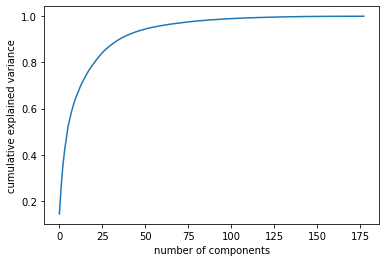

In [55]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [56]:
pca = PCA(n_components=30)
pca.fit(numericDf)
numericDf_pca = pca.transform(numericDf)

In [57]:
numericDf_pca.shape

(85870, 30)

# Clustering

In [76]:
def ClusterMetrics(df,labels):
    from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
    
    Silhouette = silhouette_score(df, labels, metric='euclidean')
    print(f"Silhouette : {Silhouette}")
    CalinskiHarabasz = calinski_harabasz_score(df, labels)
    print(f"CalinskiHarabasz : {CalinskiHarabasz}")
    DaviesBouldin = davies_bouldin_score(df, labels)
    print(f"DaviesBouldin : {DaviesBouldin}")
    

## K Means

In [69]:
df_clustering = numericDf_pca.copy()

In [70]:
def inertiaCalculationKmeans(df):   
    numberClusters = range(1, 11)
    inertiaResults = []
    for n_clus in numberClusters:
        kmclust = KMeans(n_clusters = n_clus, init = 'k-means++', n_init = 15, random_state=1)
        kmclust.fit(df)
        inertiaResults.append(kmclust.inertia_)
    return inertiaResults

In [71]:
Inertia = inertiaCalculationKmeans(df_clustering)

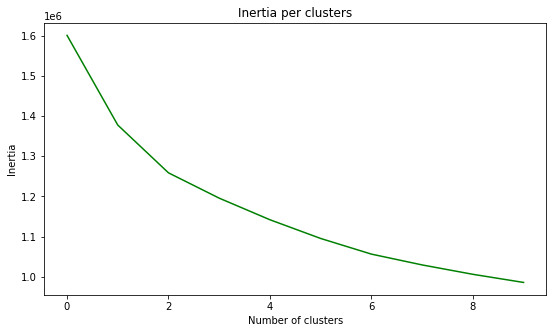

In [72]:
plt.figure(figsize=(9,5))
plt.plot(Inertia, color = 'g')
plt.ylabel("Inertia")
plt.xlabel("Number of clusters")
plt.title("Inertia per clusters")
plt.show()

In [78]:
KMeansAlgorithm = KMeans(n_clusters = 3, init = 'k-means++', n_init = 15, random_state=1).fit(df_clustering)

In [84]:
pd.DataFrame(KMeansAlgorithm.labels_).value_counts()

1    32988
0    31515
2    21367
dtype: int64

In [80]:
ClusterMetrics(df_clustering,KMeansAlgorithm.labels_)

Silhouette : 0.12824646319523164
CalinskiHarabasz : 11655.677710543905
DaviesBouldin : 2.2768608149207914


## Mean Shift

In [73]:
from sklearn.cluster import MeanShift

In [ ]:
# To slow now, skipping
# MeanShiftClustering = MeanShift().fit(df_clustering)

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

DBSCANClustering = DBSCAN(eps=3, min_samples=2).fit(df_clustering)

In [85]:
pd.DataFrame(DBSCANClustering.labels_).value_counts()

-1    85870
dtype: int64

In [ ]:
ClusterMetrics(df_clustering,DBSCANClustering.labels_)

## Agglomerative

In [87]:
from sklearn.cluster import AgglomerativeClustering

HierarchicalClustering = AgglomerativeClustering().fit(df_clustering)

MemoryError: unable to allocate array data.

In [ ]:
ClusterMetrics(df_clustering,HierarchicalClustering.labels_)

#  ============ Testes para estudo dos dados ============ 

In [62]:
dfState = pd.DataFrame(df.groupby('STATE')['STATE'].agg({'count'})).sort_values(by=['count'], ascending=False).reset_index()
dfState.head(10)

,STATE,count
0,CA,17343
1,FL,8376
2,TX,7535
3,IL,6420
4,MI,5654
5,NC,4160
6,WA,3577
7,GA,3403
8,IN,2980
9,WI,2795


In [63]:
#pd.DataFrame(df.groupby('TCODE')['TCODE'].agg({'count'})).sort_values(by=['count'], ascending=False).reset_index()
#pd.DataFrame(df.groupby(['STATE', df.DOMAIN.str[:1]]).size())

In [64]:
dfDomain = df.groupby(df.DOMAIN.str[:1], as_index=False)['DOMAIN'].agg(['count']).sort_values(by=['count'], ascending=False).reset_index()
dfDomain

#U=Urban
#C=City
#S=Suburban
#T=Town
#R=Rural

,DOMAIN,count
0,S,21924
1,R,19790
2,C,19689
3,T,19527
4,U,12166
5,,2316


In [65]:
df.groupby(df.DOMAIN, as_index=False)['DOMAIN'].agg(['count']).sort_values(by=['count'], ascending=False)

#See exception in 2nd byte - value 3 is different in Urban communities

,count
DOMAIN,
R2,13623
T2,12369
S1,11503
S2,8530
C2,8264
C1,6145
C3,5280
T1,4982
R3,4809


In [66]:
df.groupby(df['WEALTH2'], as_index=False)['WEALTH2'].agg(['count']).sort_values(by=['count'], ascending=False).reset_index()

,WEALTH2,count
0,9.0,6523
1,8.0,5975
2,7.0,5684
3,6.0,5497
4,5.0,5351
5,4.0,5074
6,3.0,5046
7,2.0,4971
8,1.0,4191
9,0.0,3277


In [67]:
selectedColumns = ['POP901', 'WEALTH2', 'AGE901', 'MARR1', 'MARR2', 'MARR3','IC3', 'IC5' , 'HHAS1', 'AC1', 'AC2', 'POP90C4', 'POP90C5', 'HHAGE1', 'HHAGE2', 'MALEVET', 'VIETVETS', 'WWIIVETS']

#POP901          Number of Persons
#WEALTH2         Wealth Rating
#AGE901          Median Age of Population
#MARR1           Percent Married
#MARR2           Percent Separated or Divorced
#MARR3           Percent Widowed
#IC3             Average Household Income in hundreds
#IC5             Per Capita Income
#HHAS1           Percent Households on Social Security
#AC1             Percent Adults Age 55-59
#AC2             Percent Adults Age 60-64
#POP90C4         Percent Male
#POP90C5         Percent Female
#HHAGE1          Percent Households w/ Person 65+
#HHAGE2          Percent Households w/ Person 65+ Living Alone
#MALEVET         % Males Veterans
#VIETVETS        % Vietnam Vets
#WWIIVETS        % WWII Vets

In [68]:
dfCorrelation = df[selectedColumns]

corPearson = dfCorrelation.corr()
corHeatmap(corPearson)

NameError: name 'corHeatmap' is not defined

In [ ]:
filterDf = df[df['MDMAUD'] != 'XXXX']
filterDf

In [ ]:
filterDfCorrelation = filterDf[selectedColumns]

corPearson = filterDfCorrelation.corr()
corHeatmap(corPearson)

In [ ]:
dfNaNIgnore = df[selectedColumns].copy().dropna()
dfNaNMean = df[selectedColumns].copy().fillna(df.mean())

In [ ]:
def inertiaCalculation(df):   
    numberClusters = range(1, 11)
    inertiaResults = []
    for n_clus in numberClusters:
        kmclust = KMeans(n_clusters = n_clus, init = 'k-means++', n_init = 15, random_state=1)
        kmclust.fit(df)
        inertiaResults.append(kmclust.inertia_)
    return inertiaResults

In [ ]:
inertiaDfIgnore = inertiaCalculation(dfNaNIgnore)
inertiaDfMean = inertiaCalculation(dfNaNMean)

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(inertiaDfIgnore, color = 'g')
plt.plot(inertiaDfMean, color = 'y')
plt.ylabel("Inertia")
plt.xlabel("Number of clusters")
plt.title("Inertia per clusters")
plt.show()

In [ ]:
#Lapsed Donors
df[df['MDMAUD'].str[0] == 'L']

In [ ]:
#Different types of donors
dfMDMAUD = df.groupby(['MDMAUD'], as_index=False)['MDMAUD'].agg(['count'])
dfMDMAUD

In [ ]:
#Different types of lapsed donors
dfMDMAUD_L = df[df['MDMAUD'].str[0] == 'L'].groupby(['MDMAUD'], as_index=False)['MDMAUD'].agg(['count'])
dfMDMAUD_L

In [ ]:
#Count of the different types of donors (1st byte)
df.groupby(df.MDMAUD.str[:1], as_index=False)['MDMAUD'].agg(['count'])

In [ ]:
#Count on the frequency of giving (2nd byte)
df.groupby(df.MDMAUD.str[2:3], as_index=False)['MDMAUD'].agg(['count'])

In [ ]:
#% Males active in the Military
df['MALEMILI']

In [ ]:
#4th byte: Blank/meaningless/filler - 'X' indicates that the donor is not a major donor.
df.groupby(df.MDMAUD.str[3:4], as_index=False)['MDMAUD'].agg(['count'])

In [ ]:
df['LASTDATE']